# Predict the total number of bikes people rented in a given hour using decision trees and random forests

## 1. Read in data 

In [17]:
# read in data
import numpy as np
import pandas as pd
bike_rentals = pd.read_csv('bike_rental_hour.csv')

print(bike_rentals.info())
bike_rentals.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


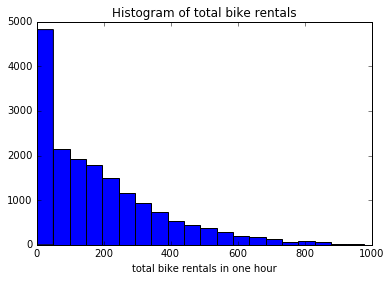

In [7]:
# total rentals distributin 
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(1)
plt.hist(bike_rentals['cnt'], bins=20)
plt.xlabel('total bike rentals in one hour')
plt.title('Histogram of total bike rentals')


In [15]:
print(bike_rentals.isnull().sum())
# correlations of each column with total bike rentals(cnt)
correlations = bike_rentals.corr()['cnt'].sort_values()
print(correlations)

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
hum          -0.322911
weathersit   -0.142426
holiday      -0.030927
weekday       0.026900
workingday    0.030284
windspeed     0.093234
mnth          0.120638
season        0.178056
yr            0.250495
instant       0.278379
hr            0.394071
atemp         0.400929
temp          0.404772
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64


### No null values in the dataframe. For the correlation coefficients, we should discard "casual" and "registered" as they are subsets of "cnt"

## 2. Convert some of the feature columns

In [18]:
# convert hour to morning (1), afternoon (2), evening (3), and night (4)
def assign_label(hour):
    if hour in range(6,12):
        return 1
    if hour in range(12, 18):
        return 2
    if hour in range(18, 24):
        return 3
    if hour in range(0, 6):
        return 4
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)
bike_rentals['time_label'].value_counts()
        

2    4375
3    4368
1    4360
4    4276
Name: time_label, dtype: int64

## 3. Split data into training set and test set. Select mean absolute error as the error metric.

In [19]:
stop_row = int(bike_rentals.shape[0] * 0.8)
train = bike_rentals.sample(frac=0.8)
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]
print(train.shape)
print(test.shape)

(13903, 18)
(3476, 18)


## 4. Select columns as features and target and train a Linear Regression model

In [33]:
features = ['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'time_label']

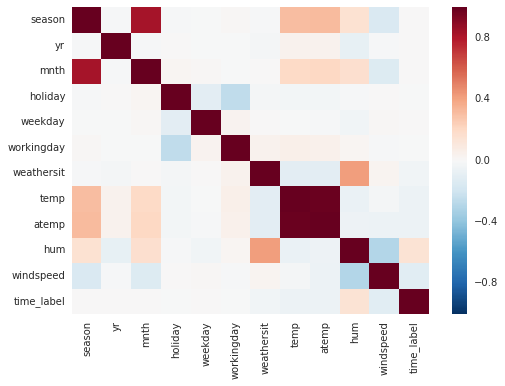

In [26]:
import seaborn as sns
fig = plt.figure(2)
sns.heatmap(bike_rentals[features].corr())

In [34]:
features.remove('atemp')

In [35]:
features.remove('season')

### Remove columns 'season' as it correlates highly with month. Remove 'atemp' as it sort of duplicates 'temp'

In [37]:
target = 'cnt'
print(features, target)

['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'time_label'] cnt


In [39]:
# fit a LInear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
model = LinearRegression()
model.fit(train[features], train[target])
predictions = model.predict(test[features])
mae = mean_absolute_error(test[target], predictions)
print(mae)


103.97124042208331


### A linear regression model with many features leads to a mean absolute error of ~103. This is a big error comparing to the actual 'cnt' values

## 5. Apply Desicion Trees Regression

In [41]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()
model2.fit(train[features], train[target])
predictions2 = model2.predict(test[features])
mae2 = mean_absolute_error(test[target], predictions2)
print(mae2)


94.73964326812428


### A simple desition tree regression model gives less error than the linear model

In [44]:
# test different parameters for the decision tree regressor

for depth in range(2,21):
    model2 = DecisionTreeRegressor(random_state=2, max_depth=depth)
    model2.fit(train[features], train[target])
    predictions2 = model2.predict(test[features])
    mae2 = mean_absolute_error(test[target], predictions2)
    print("Maximum depth: {}, Mean absolute error: {}".format(depth, mae2))

Maximum depth: 2, Mean absolute error: 101.56584842965941
Maximum depth: 3, Mean absolute error: 95.5131861942639
Maximum depth: 4, Mean absolute error: 90.29330328284082
Maximum depth: 5, Mean absolute error: 87.71000748166861
Maximum depth: 6, Mean absolute error: 86.15555187248393
Maximum depth: 7, Mean absolute error: 83.71412061327558
Maximum depth: 8, Mean absolute error: 82.47926419732016
Maximum depth: 9, Mean absolute error: 81.21105423100674
Maximum depth: 10, Mean absolute error: 81.1120999288759
Maximum depth: 11, Mean absolute error: 82.53097326717895
Maximum depth: 12, Mean absolute error: 83.21640670923688
Maximum depth: 13, Mean absolute error: 86.04382842997539
Maximum depth: 14, Mean absolute error: 87.0627809326752
Maximum depth: 15, Mean absolute error: 89.87589638146716
Maximum depth: 16, Mean absolute error: 91.56049177645417
Maximum depth: 17, Mean absolute error: 92.33019642031277
Maximum depth: 18, Mean absolute error: 92.99720675847429
Maximum depth: 19, Mean 

In [47]:
for sample in range(2,50):
    model3 = DecisionTreeRegressor(random_state=2, min_samples_leaf=sample)
    model3.fit(train[features], train[target])
    predictions3 = model3.predict(test[features])
    mae3 = mean_absolute_error(test[target], predictions3)
    print("Min sample on a leaf: {}, Mean absolute error: {}".format(sample, mae3))

Min sample on a leaf: 2, Mean absolute error: 89.53304085155351
Min sample on a leaf: 3, Mean absolute error: 87.33993985971834
Min sample on a leaf: 4, Mean absolute error: 85.80188549144246
Min sample on a leaf: 5, Mean absolute error: 84.61280653402346
Min sample on a leaf: 6, Mean absolute error: 82.6413755987332
Min sample on a leaf: 7, Mean absolute error: 82.13639813788691
Min sample on a leaf: 8, Mean absolute error: 81.7194190087583
Min sample on a leaf: 9, Mean absolute error: 80.57157806928774
Min sample on a leaf: 10, Mean absolute error: 80.07922116151687
Min sample on a leaf: 11, Mean absolute error: 80.03732848085545
Min sample on a leaf: 12, Mean absolute error: 80.44649331612484
Min sample on a leaf: 13, Mean absolute error: 80.63208739339431
Min sample on a leaf: 14, Mean absolute error: 80.99882671848347
Min sample on a leaf: 15, Mean absolute error: 81.1438445605358
Min sample on a leaf: 16, Mean absolute error: 80.9100851494565
Min sample on a leaf: 17, Mean absolu

In [48]:
model4 = DecisionTreeRegressor(random_state=2, max_depth=10, min_samples_leaf=10)
model4.fit(train[features], train[target])
predictions4 = model4.predict(test[features])
mae4 = mean_absolute_error(test[target], predictions4)
print("Maximum depth: {}, Mean absolute error: {}".format(depth, mae4))

Maximum depth: 20, Mean absolute error: 80.44782907871848


### With varying parameters in DecisionTreeRegressor, we can get the mean absolute error to as low as 80. 

## 5. Apply Random Forest algorithm

In [52]:
from sklearn.ensemble import RandomForestRegressor
for n in range(2, 20):
    model5 = RandomForestRegressor(n_estimators=n, bootstrap=True, random_state=2, max_depth=10, min_samples_leaf=10)
    model5.fit(train[features], train[target])
    predictions5 = model5.predict(test[features])
    mae5 = mean_absolute_error(test[target], predictions5)
    print("Number of trees: {}, Mean absolute error: {}".format(n, mae5))

Number of trees: 2, Mean absolute error: 79.3322209666147
Number of trees: 3, Mean absolute error: 77.90040945472943
Number of trees: 4, Mean absolute error: 77.50227397541137
Number of trees: 5, Mean absolute error: 77.53764078620009
Number of trees: 6, Mean absolute error: 77.12683834238513
Number of trees: 7, Mean absolute error: 77.19798481570876
Number of trees: 8, Mean absolute error: 76.77470902122998
Number of trees: 9, Mean absolute error: 76.78337206242334
Number of trees: 10, Mean absolute error: 76.78045309874634
Number of trees: 11, Mean absolute error: 76.76402846231163
Number of trees: 12, Mean absolute error: 76.8062786927154
Number of trees: 13, Mean absolute error: 76.76326120227382
Number of trees: 14, Mean absolute error: 76.65385692706528
Number of trees: 15, Mean absolute error: 76.60075324510665
Number of trees: 16, Mean absolute error: 76.63898121347243
Number of trees: 17, Mean absolute error: 76.67385037547254
Number of trees: 18, Mean absolute error: 76.57488

### Inhereted max_depth and min_samples_leaf from previous decision trees tests. Here we further tested the number of trees in the emsemble and we can reduce the mean absolute error to ~76 with over 10 trees. 